## 木のサイズごとの可視化

In [1]:
# 親切な方が2019/2/19にGraphviz不要な可視化ライブラリを作ってくれためありがたく使う
# https://qiita.com/nekoumei/items/7f2209295515c3aa1053

# インストールはpipでOK。Linux環境での実行を推奨
# !pip install dtreeplt

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from dtreeplt import dtreeplt

In [3]:
# 目的変数が一番最初のカラムであることを確認
# data = pd.read_csv('../data/basedata/train.csv')
data = pd.read_csv('train.csv')
data.head()

,Survived,Age,Fare,Pclass_1.0,Pclass_2.0,Pclass_3.0,Pclass_nan,Sex_female,Sex_male,Sex_nan,...,Parch_2.0,Parch_3.0,Parch_4.0,Parch_5.0,Parch_6.0,Parch_nan,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,0,22.0,7.2500,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,38.0,71.2833,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,26.0,7.9250,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,35.0,53.1000,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,35.0,8.0500,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
# 学習。今回は剪定なし
model = DecisionTreeClassifier(random_state=0)
model.fit(data.iloc[:,1:], data.iloc[:,0])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

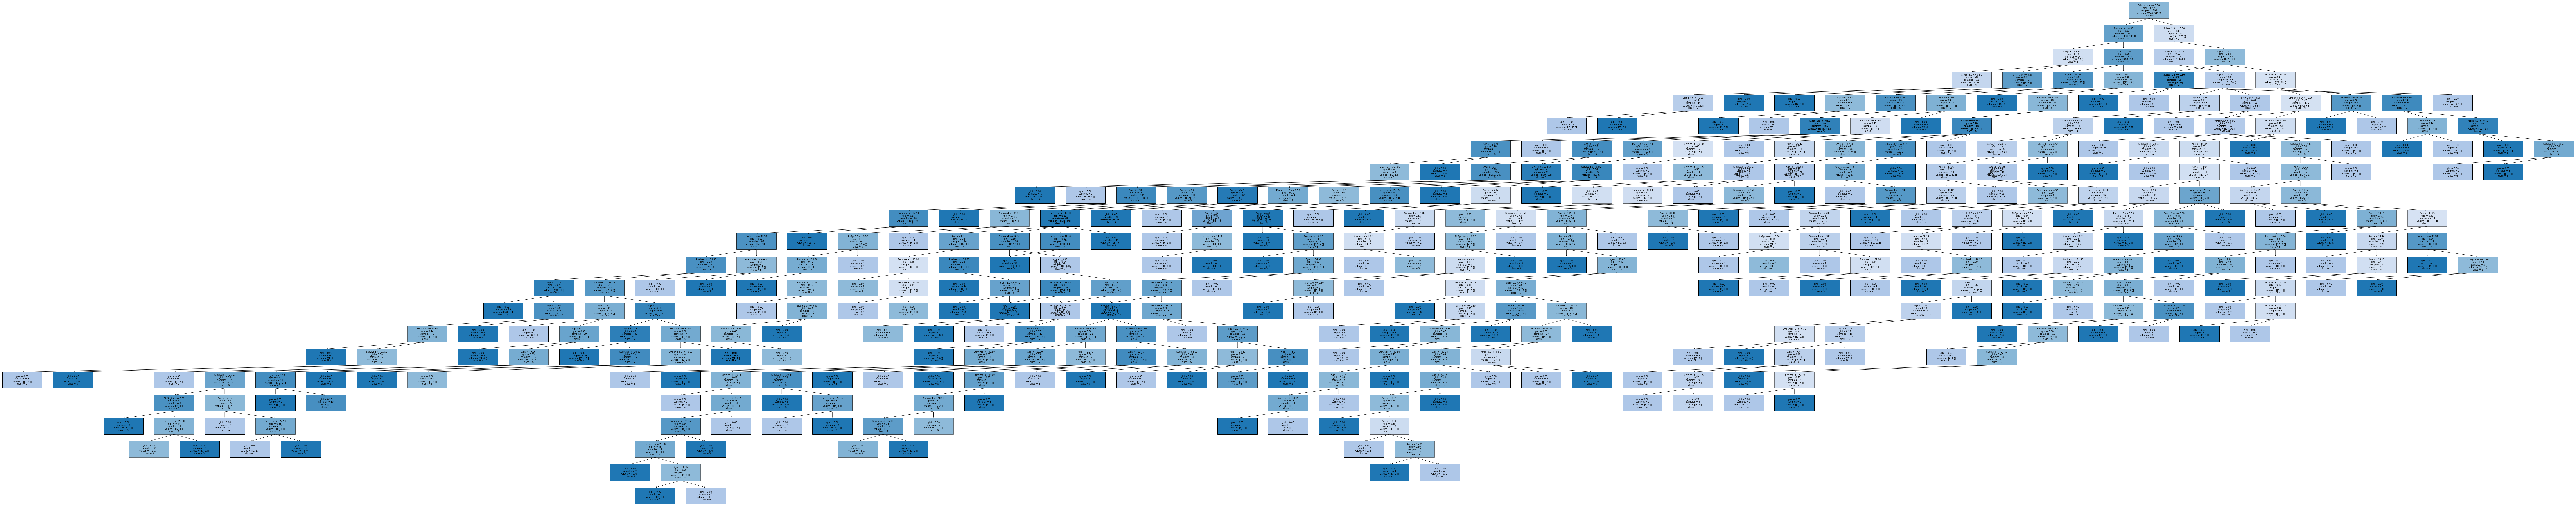

In [5]:
# 図示。これだけで森になってるのでは？と思うほどの大きさ

dtree = dtreeplt(
    model=model,
    feature_names=data.columns.tolist(),
    target_names='Survived'
)
fig = dtree.view()

In [6]:
# 今度は木の深さを3に設定し学習。
model = DecisionTreeClassifier(random_state=0, max_depth=3)
model.fit(data.iloc[:,1:], data.iloc[:,0])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

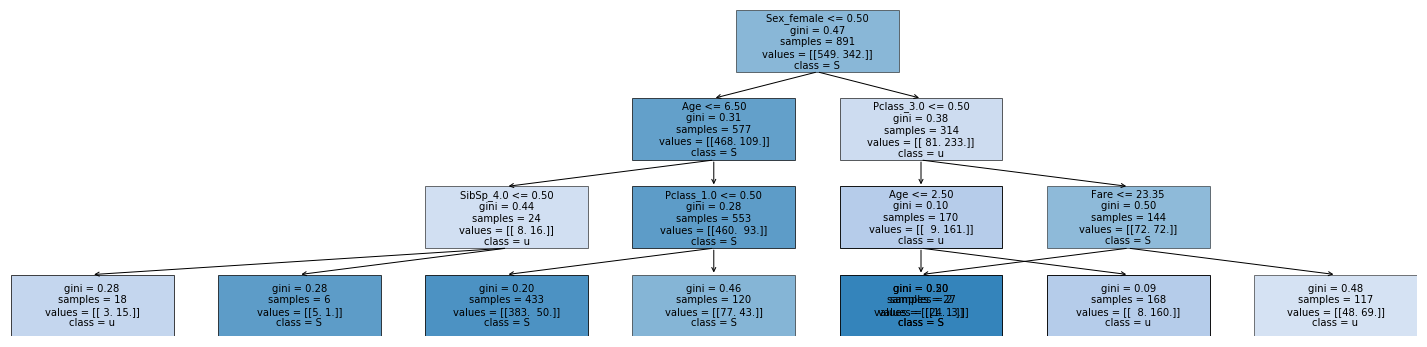

In [7]:
dtree = dtreeplt(
    model=model,
    feature_names=data.columns.tolist()[1:],
    target_names='Survived'
)
fig = dtree.view()